# Assignment 2 – Blackbody radiatioon and determinatin of b, the Wien dissplacement Constant.
## Anna Rooney, 19333456, 3rd year Physics 2024
### [My github](https://github.com/arir2001/mitchison_lab2)
### PYU33C01, Computer Simulation I: Computational Methods (Mitchison)

## Part 1: Black-body radiation -- lab 
The Planck radiation law describes the spectral density of radiation emitted by a black body in equilibrium.  
Before it was derived, others had noted that peak of the distribution changed as a function of temperature.   
This is the reason, for example, why a piece of metal glows 'red hot' at certain temperatures, but at very high temperatures glows 'white hot'.

Wilhelm Wien derived a relationship between temperature and the wavelength at which the black body spectral radiance peaks
$$ \lambda_{\rm max} = \frac{b}{T}$$
where $b$ is the _Wien displacement constant_.

Later, the Planck radiation law gave an exact expression for the black body spectral radiance (per unit wavelength) at a given temperature and wavelength:

$$ u (\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{e^{h c / \lambda k_B T} - 1} $$

In this exercise, we will use the Planck expression to estimate the value of $b$.


### Exercise 1
Define a function which returns the Planck radiation law as a function of wavelength and temperature.   
Plot the curve (in the range $10$ nm $<\lambda<1200$ nm) for several values of temperature in the range $3000$ K $< 8000$ K .

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
h = constants.Planck
c = constants.speed_of_light
kB = constants.Boltzmann

def radiance(wl, temp):
    return 2*h*c**2/wl**5*(np.exp(h*c/(wl*kB*temp)-1)**(-1))

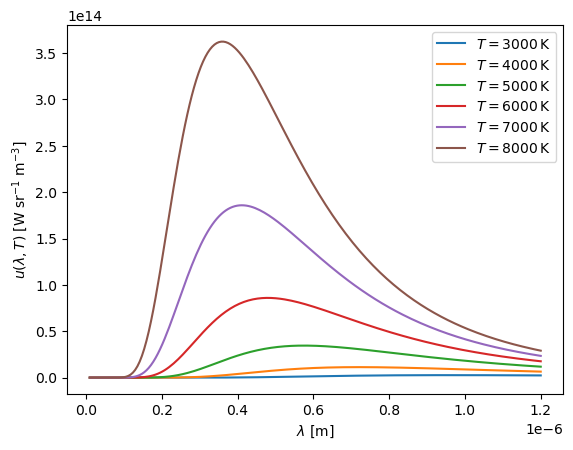

In [2]:
wls = np.linspace(1E-8, 1.2E-6, 200)
Ts = np.linspace(3000, 8000, 6)

fig, ax = plt.subplots()
for temp in Ts:
    ax.plot(wls, radiance(wls, temp), label=r'$T='+str(int(temp))+'\,\mathrm{K}$')
    
        
## set appropriate axis ticks and labels
        
ax.legend()
ax.set_xlabel('$\\lambda$ [m]')
ax.set_ylabel('$u(\\lambda,T)$ [W sr$^{-1}$ m$^{-3}$]')

plt.show()

### Exercise 2
Write a function which uses the scipy library to find the wavelength for which the Planck expression is maximum at a given temperature.   
Replot the figure above, this time also indicating the maximum point.

In [3]:
from scipy.optimize import minimize

In [10]:
# Function to find the maximum wavelength and corresponding spectral radiance
def minus_radiance(wl, temp):
    return -radiance(wl, temp)

def find_max_wl(temp):
    fmin = minimize(lambda x: minus_radiance(x, temp), 1E-6, method = 'Nelder-Mead', tol = 1E-16)
    return fmin.x[0], -fmin.fun

In [11]:
# Find positions of the maxima for each T
maxs = [find_max_wl(T) for T in Ts]

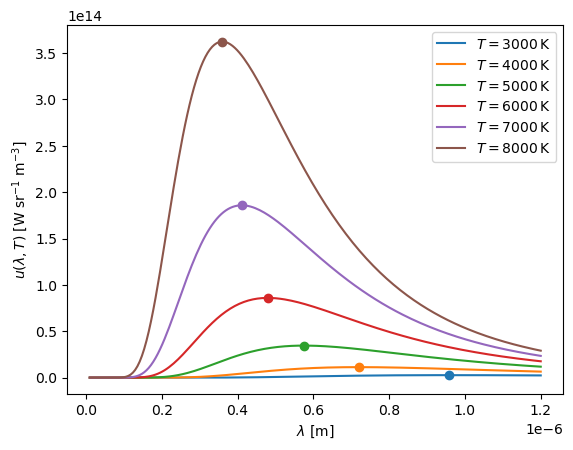

In [12]:
# Plot the results 
fig, ax = plt.subplots()
for ii, temp in enumerate(Ts):
    line, = ax.plot(wls, radiance(wls, temp), label=r'$T='+str(int(temp))+'\,\mathrm{K}$')
    ax.plot(maxs[ii][0], maxs[ii][1], 'o', color = line.get_color())

ax.legend()
ax.set_xlabel('$\\lambda$ [m]')
ax.set_ylabel('$u(\\lambda,T)$ [W sr$^{-1}$ m$^{-3}$]')

plt.show()

## Homework assignment

### Q1.
Use the function defined above to generate a longer array of $T$ and corresponding $\lambda_{\rm max}$ values in the same range.

Use least square fitting methods in scipy to estimate the Wien displacement constant $b$.

Plot the fit, and compare the estimated and true values of $b$.

In [70]:
from scipy.optimize import least_squares
b_true = constants.Wien

In [73]:
# Longer array of temperatures
T2s = np.linspace(3000, 8000,200)

# Find the maxima



In [ ]:
# Function we are fitting to
def fun_to_fit(T, b):
    ####

# Residuals function (difference between model and data)
def residuals(b, T, wl):
    #####

In [ ]:
p0 = ???
fitting = least_squares(???????)

print(fitting.x[0], b_true)

In [ ]:
fig, ax = plt.subplots()

ax.set_ylabel('Peak wavelength [m]')
ax.set_xlabel('Temperature [K]')
plt.show()

### Q2.
The total radiant power emitted per unit area (the exitance) of a large, flat black-body surface is found by integrating the spectral radiance over wavelength and over solid angle, yielding *(see below for an explanation of the factor of $\pi$)*
$$ W(T) = \pi \int_0^\infty {\rm d}\lambda \, u(\lambda,T).$$


By substituting a new integration variable $x = hc/(\lambda k_BT)$, first convince yourself _(I don't need to see your working)_ that the exitance can be written in the form
$$ W(T) = f(T) \int_0^\infty {\rm d}x \frac{x^3}{e^x-1},$$
where $f(T)$ is to be determined. Now, using the numerical integration routines in SciPy, numerically evaluate the integral over $x$. Plot $W(T)$ as a function of temperature in the same range of temperatures used above.  Show that your result agrees with the Stefan-Boltzmann law $W(T) = \sigma T^4,$ where $\sigma$ is the Stefan-Boltzmann constant.

In [ ]:
from scipy.integrate import quad
SB = constants.Stefan_Boltzmann




**Explanation:**

More precisely, writing out the integral over solid angle explicitly, we have
$$W(T) =  \int_0^{\pi/2}{\rm d}\theta \sin \theta \int_0^{2\pi} {\rm d}\phi \, \int_0^\infty {\rm d}\lambda \, u(\lambda,T) \times \cos\theta,$$
where $\theta$ and $\phi$ are the usual polar and azimuthal angle in spherical polar coordinates, which we integrate over the entire half-sphere into which the radiation is emitted ($0<\theta<\pi/2$ and $0<\phi<2\pi$). The extra factor of $\cos\theta$ arises because the intensity depends on the angle between the point of observation and the black-body surface: in particular, intensity is maximised in the direction perpendicular to the surface (defined by $\theta=0$); see the diagram [here](https://en.wikipedia.org/wiki/Stefan–Boltzmann_law#Derivation_from_Planck's_law). Evaluating the integral over the angular variables yields
$$ \int_0^{\pi/2}{\rm d}\theta \int_0^{2\pi} {\rm d}\phi \sin \theta  \cos\theta = \pi$$